In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("E:\MD\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.003226,0.051020
3,0.003226,0.775510
4,0.006452,0.397959


In [ ]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
km.cluster_centers_

array([[ 61.35148515,  50.2029703 ],
       [239.6875    ,  50.41666667]])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

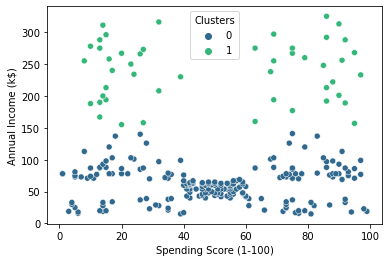

In [ ]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

In [ ]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

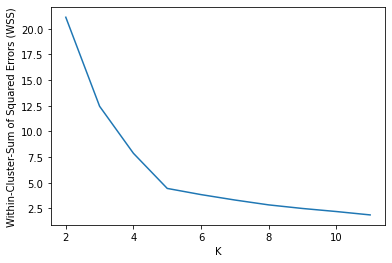

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

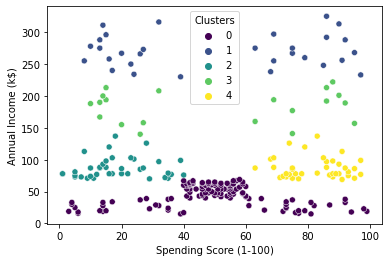

In [ ]:
df['Clusters'] = kmeans.labels_

sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

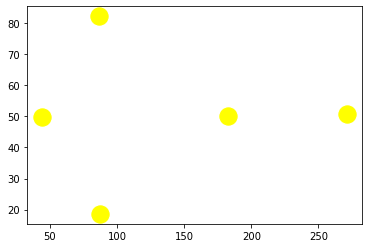

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid') 